In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

## Jump Diffusion Processes
Extend the Black-Scholes model by independentt jumps, driven by a Poisson Processes. Considering $X(t)=logS(t)$, under the real-world measure $\mathbb{P}$,
$$dX(t) = udt + \sigma dW^\mathbb{P}(t) + JdX_{\mathbf{P}}((t))$$

where $u$ is the drift, $\sigma$ is the volatility, $X_{\mathbf{P}}$ is a Poisson process and $J$ gives the jump magnitude, driven by a chosen distribution, $F_j$, of magnitudes.
$W^\mathbb{P}(t)$ and $X_{\mathbf{P}}(t)$ are assumed to be indipendent

# Definition: Poisson random variable
$X_{\mathbf{P}}(t)$ counts the number of occurences of an event during a given time period. The Probability of observing $k\geq 0$ occurences in a time period:
- $$ P[X_{\mathbf{P}} = k] = \frac{\xi_p^k e^{-\xi{_p}}}{k!}$$
- $$ \mathbb{E}[X_{\mathbf{P}}]= \xi{_p}$$
- $$\mathbb{V}ar(X_{\mathbf{P}}) = \xi_{p}$$

## Definition: Poisson Process
- $X_{\mathbf{P}}(0)$ = 0$
- $\forall t$, $ X_{\mathbf{P}}(t_n) - X_{\mathbf{P}}(t_n-1)$ are independent random variables (independent increments)
- Increments have a Poisson distribution:
$$  P[X_{\mathbf{P}(s+t)} - X_{\mathbf{P}(s)} = k] = \frac{(\xi_p^kt) e^{-\xi{_p}t}}{k!}$$
for $0<s<t$ and $k\geq0$
$X_{\mathbf{P}}(t)$ is a counting process: a process counting the number of jumps in a time period of length t.

## Details
The probability that exactly one event occurs in small time period $dt$:
- $P[X_{\mathbf{P}(s+dt)} - X_{\mathbf{P}(s)} = 1] = \frac{(\xi_pdt) e^{-\xi{_p}dt}}{1!}$ = $\xi_pdt + \omicron(dt)$ <br> <br>
and the probability that no event occurs id $dt$ is: 
- $P[X_{\mathbf{P}(s+dt)} - X_{\mathbf{P}(s)} = 0] = e^{-\xi{_p}dt}=1 - \xi_pdt + \omicron(dt)$

In $dt$, a jump will arrive with probability $\xi_pdt$:
- $$ \mathbb{E}[dX_{\mathbf{P}}]= \xi{_p}dt = 1 \cdot \xi_pdt + 0 \cdot e^{-\xi{_p}dt}$$


## Requirement
The Brownian motion increments have a nice property: the Expected value is 0.
The expected value of the increment of a Poisson process $ \mathbb{E}[dX_{\mathbf{P}}]$ is not 0.
- We define the compensated Poisson Process $\bar{X}_{\mathbf{P}}$=$X_{\mathbf{P}} - \xi{_p}dt$, which is a martingale
- so that $\mathbb{E}[d\bar{X}_{\mathbf{P}}]= 0$

Given the following SDE:
$$ dX(t)= J(t)dX_{\mathbf{P}}(t)$$
we may define the stochastic integral with respect to the Poisson process $X_{\mathbf{P}}$, by:
$$ X(T) - X(t_0) = \int_{t_0}^{T} J(t)dX_{\mathbf{P}}(t) \coloneqq  \sum_{k=1}^{X_{\mathbf{P}(T)}}J_k$$

$J_k$ for $k \geq 1$ is an i.i.d. sequence of random variables with a jump size probability distribution $F_J$, so that $\mathbb{E}[J_k]=u_j<\infty$

## Code using a for loop

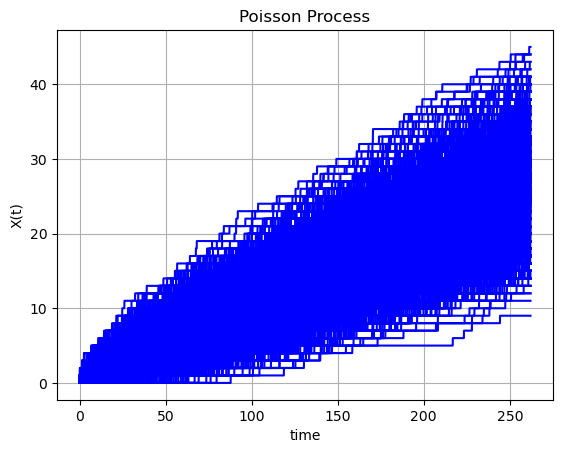

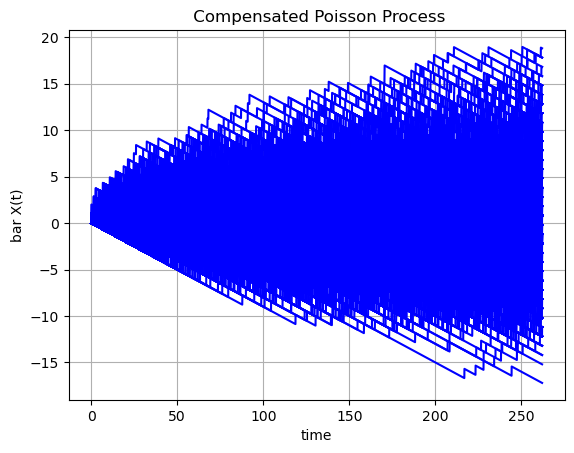

In [2]:
def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP,seed=123): 
    """
    NoOfPaths (integer): The number of simulations
    NoOfSteps (integer): The number of steps in a single path
    T         (integer): The end period of the simulation
    xiP       (integer): Average number of occurences in a a single period
    """
    # Create empty matrices for Poisson process and for compensated Poisson process
    np.random.seed(seed)
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    Xc = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    
    Z = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        X[:,i+1]  = X[:,i] + Z[:,i]
        Xc[:,i+1] = Xc[:,i] -xiP*dt + Z[:,i]
        time[i+1] = time[i] +dt
        
    paths = {"time":time,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 4000
    NoOfSteps = 4000
    T = 262
    xiP= 0.1
        
    Paths = GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]
       
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    plt.title("Poisson Process")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("bar X(t)")
    plt.title(" Compensated Poisson Process")                  
mainCalculation()

## Code using vectorization and datetime index

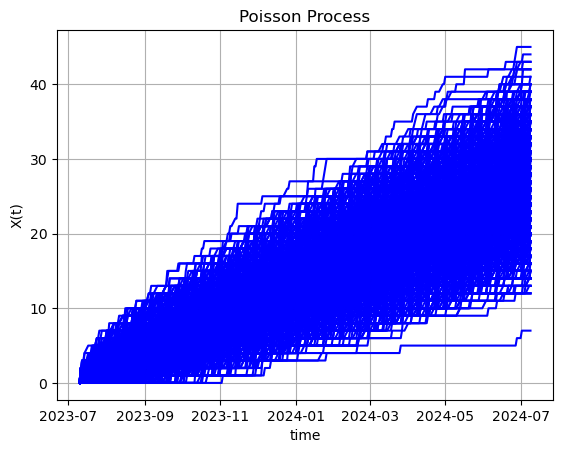

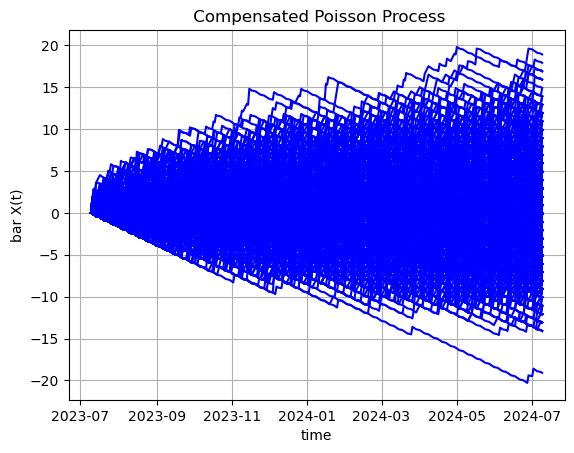

In [3]:
def GeneratePathsPoisson(NoOfPaths,Start_date,End_date,xiP,seed=123):
    """
    NoOfPaths (integer): The number of simulations
    Start_date (string): start date for the simulation
    End_date  (string): The end date of the simulation
    xiP       (integer): Average number of occurences in a a single period
    """ 
    # Create empty matrices for Poisson process and for compensated Poisson process
    np.random.seed(seed)
    start_simulation_date=datetime.strptime(Start_date,"%Y-%m-%d")
    end_simulation_date=datetime.strptime(End_date,"%Y-%m-%d")
    date_range=pd.bdate_range(start_simulation_date,end_simulation_date+pd.tseries.offsets.BDay(1),freq="B")
    time =np.arange(1,len(date_range))
    X = np.zeros([NoOfPaths,len(time)+1])
    Xc = np.zeros([NoOfPaths, len(time)+1])
    dt=1 #by default
    Z = np.random.poisson(xiP*dt,[NoOfPaths,len(time)])
    # making sure that samples from normal have mean 0 and variance 1
    X[:,1:]= Z.cumsum(axis=1)
    Xc[:,1:] =  Z.cumsum(axis=1) - xiP *time
    paths = {"time":date_range,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 4000
    Start_date=datetime.strftime((datetime.today() - relativedelta(years=1)),format="%Y-%m-%d")
    End_date= datetime.strftime((datetime.today()),format="%Y-%m-%d")
    xiP= 0.1
    Paths = GeneratePathsPoisson(NoOfPaths,Start_date,End_date,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]
       
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    plt.title("Poisson Process")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("bar X(t)")
    plt.title(" Compensated Poisson Process")                  
mainCalculation()

## Ito's Lemma and Jumps
To derive the dynamics for $S(t) = e^{X(t)} a variant of Ito's lemma related to the Poissomn process needs to be employed.
We consider a càdlàg process, $X(t)$, defined as:
$$dX(t) = u(t,X(t))dt + \bar{J}(t,X(t_-)) dX_{\mathbf{P}}(t)$$
where $t_-$ is the moment before the jump takes place 

for a differentiable function $g:[0,\infty) \times \mathbb{R} \rightarrow \mathbb{R} $ the Ito's diffeential reads:
$$ dg(t,X(t)) = \bigg[ \frac{\partial g(t,X(t))}{\partial t} + \bar{u}(t,X(t)) \frac{\partial g(t,X(t))}{\partial X}\bigg] dt + \bigg[g(t,X(t_-) +  \bar{J}(t,X(t_-))) - g(t,X(t_-))\bigg]dX_{\mathbf{P}}(t)$$

Including the diffusion component the process $dX(t)$ becomes:
$$dX(t) = u(t,X(t))dt + \bar{J}(t,X(t_-)) dX_{\mathbf{P}}(t) + \sigma(t,X(t))dW(t) $$

Assuming the independence between $X_{\mathbf{P}}(t)$ and $W(t)$ the dynamic of $g(t,X(t))$ becomes: 
$$ dg(t,X(t)) = \bigg[ \frac{\partial g(t,X(t))}{\partial t} + \bar{u}(t,X(t)) \frac{\partial g(t,X(t))}{\partial X}+ \frac{1}{2}\sigma^2(t,X(t))\frac{\partial^2 g(t,X(t))}{\partial^2 X}\bigg] dt + \bigg[g(t,X(t_-) +  \bar{J}(t,X(t_-))) - g(t,X(t_-))\bigg]dX_{\mathbf{P}}(t) \\
+ \sigma(t,X(t)) \frac{\partial g(t,X(t))}{\partial X}dW(t)$$

## Asset Dynamics under the $\mathbb{P}$ measure
To apply Ito's Lemma to the function $S(t) =e^{X(t)}$, substitute $\bar{u}(t,X(t))=u$, $\sigma(t,X(t))=\sigma$ and $ \bar{J}(t,X(t_-))=J$. 
Than:
- $ de^{X(t)}=(u + \frac{1}{2}\sigma^2)e^{X(t)}dt + \sigma e^{X(t)}dW(t) + (e^{X(t)+J}-1)dX_{\mathbf{P}}(t).$ <br> <br>
So that, we obtain: <br> <br>
- $ \frac{dS(t)}{S_t}=(u + \frac{1}{2}\sigma^2)dt + \sigma dW(t) + (e^{J}-1)dX_{\mathbf{P}}(t)$ <br>
Dynamics for stock $S(t)$ under the real world measure $\mathbb{P}$

## Risk Neutral $\mathbb{Q}$ measure 
Process dY(t)= \frac{S(t)}{M(t)}, where dM(t)=r(t)dt is the dynamic of a money market account. Than:
- $   dY(t) =\frac{dS(t)}{dM(t)} - \frac{r(S(t)dt)}{M(t)}$ should have zero expectation (driftless)$


From the fact that all random components in the expression above are mutually independent, we get:
- $ \mathbb{E}[dY(t)] =  \mathbb{E} \bigg[(u + \frac{1}{2}\sigma^2 - r) S(t)\bigg]dt + \mathbb{E} \bigg[ (e^{J}-1) S(t)\bigg]\xi_pdt + \mathbb{E} \bigg[\sigma S(t) dW(t)\bigg] $
- $dW^{\mathbb{Q}}(t)=dW(t) + \lambda(t)dt$
- $dX^{\mathbb{Q}}(t)_\mathbf{P}=dX(t)_\mathbf{P} + \gamma(t)dt$

-  $ \mathbb{E}[dY(t)] =  \bigg(u - r + \frac{1}{2}\sigma^2 +\xi_p\mathbb{E}[(e^{J}-1)] -\sigma \lambda(t) -\gamma(t)\bigg) \mathbb{E}[S(t)]dt + \mathbb{E} \bigg[\sigma S(t) dW^{\mathbb{Q}}(t)\bigg]$
-  By substituting $ \lambda(t) = \frac{u - r}{\sigma} + \frac{1}{2}\sigma$ and  $ \gamma(t) = \xi_p\mathbb{E}[e^J-1]$ we have $\mathbb{E}[dY(t)] = 0$ 
- the term $\xi_p\mathbb{E}[e^J-1]$ is the so called drift correction term
-  $ \frac{dS(t)}{S_t}=( r - \xi_p\mathbb{E}[e^J-1])dt + \sigma dW^{\mathbb{Q}}(t) + (e^{J}-1)dX^{\mathbb{Q}}_{\mathbf{P}}(t)$

## Merton Jump diffusion model
In the Merton model $ J \sim \mathbf{N}(u_J,\sigma^2_J)$
Effects of the parameters in the volatility smile:
- $\sigma_J$ has a significant impact on the curvature
- $\xi_p$ controls the overall level of the implied volatility
- $u_J$ influences the implied volatility slope

## Standard code

In [4]:
def GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma,seed=123):  
    # Create empty matrices for Poisson process and for compensated Poisson process
    np.random.seed(123)
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0
    
    # Expectation E(e^J) for J~N(muJ,sigmaJ^2)
    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)
    
    ZPois = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    
    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])
    
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        # making sure that samples from normal have mean 0 and variance 1
        X[:,i+1]  = X[:,i] + (r - xiP*(EeJ-1) - 0.5*sigma*sigma)*dt +sigma*np.sqrt(dt)* Z[:,i]\
                    + J[:,i] * ZPois[:,i]
        time[i+1] = time[i] +dt
        
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

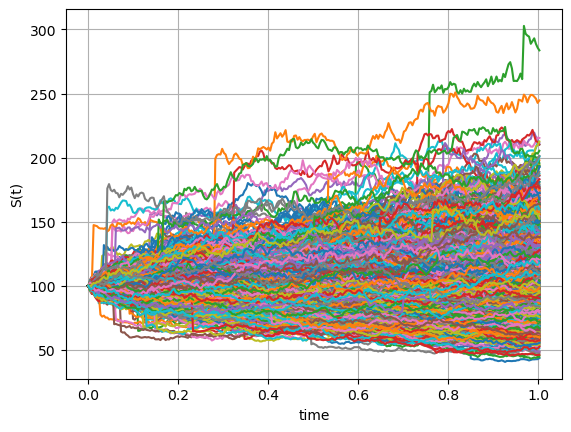

In [5]:
def mainCalculation():
    np.random.seed(123)
    NoOfPaths = 5000
    NoOfSteps = 263
    T = 1.002
    xiP = 0.1
    muJ = 0
    sigmaJ = 0.2
    sigma = 0.2

    S0 =100
    r=0.05
    Paths = GeneratePathsMerton(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
                       
mainCalculation()

## Code with vectorization

In [6]:
import numpy as np
import pandas as pd
from datetime import datetime

def GeneratePathsMerton2(NoOfPaths, Start_date, End_date, S0, r, sigma, xiP, muJ, sigmaJ, seed=123):
    """
    Simulate paths of the Merton model using vectorization.

    Parameters:
    - NoOfPaths (int): Number of simulations.
    - Start_date (str): Start date for the simulation (format: "%Y-%m-%d").
    - End_date (str): End date of the simulation (format: "%Y-%m-%d").
    - S0 (float): Initial asset price.
    - r (float): Risk-free interest rate.
    - sigma (float): Volatility of the asset price.
    - xiP (float): Average number of occurrences in a single period.
    - muJ (float): Mean of the jump size distribution.
    - sigmaJ (float): Standard deviation of the jump size distribution.
    - seed (int): Random seed for reproducibility.

    Returns:
    - paths (dict): Dictionary containing arrays for dates and simulated asset prices (S).
    """
    

    EeJ = np.exp(muJ + 0.5 * sigmaJ**2)

    # Date calculations
    Start_date = datetime.strftime((datetime.today() - relativedelta(years=1)), format="%Y-%m-%d")
    End_date = datetime.strftime((datetime.today()), format="%Y-%m-%d")
    start_simulation_date = datetime.strptime(Start_date, "%Y-%m-%d")
    end_simulation_date = datetime.strptime(End_date, "%Y-%m-%d")
    num_years = (end_simulation_date - start_simulation_date).days / 365
    date_range = pd.bdate_range(start_simulation_date, end_simulation_date + pd.tseries.offsets.BDay(1), freq="B")
    Num_steps = len(date_range) - 1
    delta_t = num_years / Num_steps
    Z = np.random.normal(0.0, 1.0, [NoOfPaths, Num_steps])
    Z_poiss = np.random.poisson(xiP * delta_t, [NoOfPaths,Num_steps])
    J = np.random.normal(muJ, sigmaJ, [NoOfPaths, Num_steps])
    # Simulation setup
    aux_df = np.ones(shape=(NoOfPaths, Num_steps))
    vector_steps = np.arange(0, Num_steps)
    drift = r - xiP * (EeJ - 1) - 0.5 * sigma**2

    # Putting 0 drift at the first columns
    drift_n = np.hstack([np.zeros(shape=(NoOfPaths, 1)), (drift * delta_t * (aux_df * vector_steps))])
    stochastic_sim= sigma*np.sqrt(delta_t)* Z + J*Z_poiss
    stochastic_component=np.cumsum(np.hstack([np.zeros(shape=(NoOfPaths,1,)), stochastic_sim]), axis=1)
    X=drift_n + stochastic_component
    S=S0*np.exp(X)
    
    # Return results as a dictionary
    paths = {"time": date_range, "S": S,"X":X}
    
    return paths


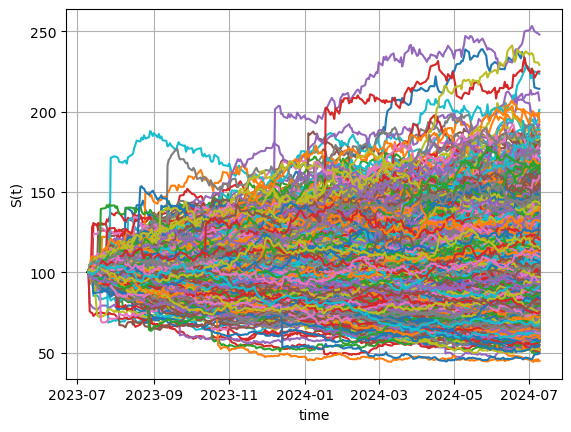

In [7]:
def mainCalculation():
    np.random.seed(123)
    Start_date=datetime.strftime((datetime.today() - relativedelta(years=1)),format="%Y-%m-%d")
    End_date= datetime.strftime((datetime.today()),format="%Y-%m-%d")
    NoOfPaths = 5000
    xiP = 0.1
    muJ = 0
    sigmaJ = 0.2
    sigma = 0.2

    S0 =100
    r=0.05
    Paths = GeneratePathsMerton2(NoOfPaths, Start_date, End_date, S0, r, sigma, xiP, muJ, sigmaJ, seed=123)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
                       
mainCalculation()

## Partial Integro - Differential Equations (PIDE)
$ dS(t)=( \bar{u}(t,X(t)))dt + \sigma(t,X(t)) dW^{\mathbb{Q}}(t) + \bar{J}(t,X(t))dX^{\mathbb{Q}}_{\mathbf{P}}(t)$
where:
-  $\bar{u}(t,X(t)) \coloneqq (r - \xi_p\mathbb{E}[e^J-1])S(t)$
-  $ \sigma(t,X(t)) \coloneqq \sigma S(t) $
- $\bar{J}(t,X(t))= (e^j-1)S(t)$


With $\mathbb{Q}$ dynamics we can apply the martingale approach to derive the option pricing equation. 
$$ \frac{V(t,S)}{M(t)} = \mathbb{E}^{\mathbb{Q}}\bigg[\frac{V(T,S)}{M(T)} | \mathbf{F}_t\bigg]

With Ito's Lemma:
- $d\frac{V}{M} = \frac{1}{M}dV - r\frac{V}{M}dt$ <br>
The dynamic of V is obtained using Ito's lemma for the Poisson Process:
$$ dV = \bigg(\frac{\partial V}{\partial t} + \bar{u}(t,S) \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2(t,S) \frac{\partial^2 V}{\partial^2 S} \bigg) dt + \sigma(t,S) \frac{\partial V}{\partial S} dW^{\mathbb{Q}}(t) + (V(t,Se^J) - V(t,S))dX^\mathbb{Q}_\mathbf{P}(t)$$

Substituying:
$$ d\frac{V}{M} =\frac{1}{M}  \bigg(\frac{\partial V}{\partial t} + \bar{u}(t,S) \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2(t,S) \frac{\partial^2 V}{\partial^2 S} \bigg) dt + \frac{\sigma(t,S)}{M} \frac{\partial V}{\partial S} dW^{\mathbb{Q}}(t) + \frac{1}{M} (V(t,Se^J) - V(t,S))dX^\mathbb{Q}_\mathbf{P}(t)$$

Because $ \frac{V}{M}$ is a martingal, it follows that: 
$$ \bigg(\frac{\partial V}{\partial t} + \bar{u}(t,S) \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2(t,S) \frac{\partial^2 V}{\partial^2 S} \bigg) dt + \mathbb{E}[(V(t,Se^J) - V(t,S))] \mathbb{E}[dX^\mathbb{Q}_\mathbf{P}(t)] = 0$$

Substituying:
$$ \frac{\partial V}{\partial t} +  (r - \xi_p\mathbb{E}[e^J-1])S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial^2 S} + \xi_p\mathbb{E}[V(t,Se^J)] -(r +\xi_p)V = 0$$

For the jump diffusion process under measure Q, we arrive at the following option valuation PIDE, in terms of the prices S

$$
\left\{
\begin{array}{l}
- \frac{\partial V}{\partial t} = \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial^2 S}  +  (r - \xi_p\mathbb{E}[e^J-1])S \frac{\partial V}{\partial S} -(r +\xi_p)V + \xi_p\int_{0}^{\infty} V(t,Se^y)dF_J(y)\\
V(T,S) = max(\bar{a}(S(T) -K),0)
\end{array}
\right.
$$
with $ \bar{a}$=1 for calls and  $ \bar{a}$=-1 for puts

In log-coordinates X(t) = log S(t), the corresponding PIDE for V(t,X) is given by:
$$
\left\{
\begin{array}{l}
- \frac{\partial V}{\partial t} = \frac{1}{2} \sigma^2 \frac{\partial^2 V}{\partial^2 X}  +  (r - \xi_p\mathbb{E}[e^J-1]) \frac{\partial V}{\partial X} -(r +\xi_p)V + \xi_p\int_{\mathbb{R}} V(t,X+y)dF_J(y)\\
V(T,S) = max(\bar{a}(e^{S(T)}) -K),0)
\end{array}
\right.
$$
with $ \bar{a}$=1 for calls and  $ \bar{a}$=-1 for puts

## Expectation and Jump Processes 
We need the tower property of expectations for discrete random variables.
Suppose $X_1,X_2,...,X_N$ are independent random variables with mean $u$ and $N_J$ is a non negative integer-valued random variable, independent of $X_i$?S. Then (Wald's equation),
$$ \mathbb{E}\bigg[\sum_{i=1}^{N_j}X_i\bigg] =u \mathbb{E}[N_J].$$
Using the tower property for discrete random variables $z_i,z_2$ gives,
$$ \mathbb{E}[\mathbb{E}[z_1|z_2]] = \sum_z \mathbb{E}[z_1|z_2=z] \mathbb{P}[z_2=z]$$

so that
$$ \mathbb{E}\bigg[\sum_{i=1}^{N_J}X_i\bigg] = \sum_{n=1}^{\infty} \mathbb{E}[X_i|N_J=n]  \mathbb{P}[N_J=n] = \sum_{n=1}^{\infty} \mathbb{P}[N_J=n]  \sum_{k=1}^{n} \mathbb{E}[X_i]$$

where: 
- $\sum_{k=1}^{n}\mathbb{E}[X]= \sum_{k=1}^{n} u$

$$ \mathbb{E}\bigg[\sum_{i=1}^{N_J}X_i\bigg] =  u \sum_{n=1}^{\infty} n \mathbb{P}[N_J=n]= u \mathbb{E}[N_J].$$

## Characteristic function 
Merton's jump diffusion model under $ \mathbb{Q}$ consists of a Brownian motion and a compound Poisson process with $t_0=0$, 
$$ X(t) = X(t_0) + \bar{u}t + \sigma W(t) + \sum_{k=1}^{X_\mathbf{P}(t)}J_k.$$
where:
- $\bar{u}= r - \frac{1}{2}\sigma^2 -\xi_p\mathbb{E}[(e^{J}-1)]$
- $\mathbb{E}[J_k]=u_J$

$\phi_X(z) \coloneqq \mathbb{E}\bigg[e^{izX(t)}\bigg] = e^{izX(0)} e^{iz\bar{u}t} \mathbb{E}[e^{iz\sigma W_t}] \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] $

As $W(t) \sim \mathbf{N}(0,t)$ it follows $\mathbb{E}[e^{iu\sigma W(t)}] = e^{- \frac{1}{2} \sigma^2u^2t}$

For the second expectation, consider the summation:
$$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = \sum_{n=1}^{\infty} \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K} | X_{\mathbf{P}}(t) = n \bigg] \mathbb{P}[X_{\mathbf{P}}(t) = n]$$

which results from the tower property of expectations. We have, 
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = \sum_{n=1}^{\infty} \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K} \bigg]\frac{ e^{-\xi{_p}t}(\xi_p t)^n}{n!}$$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = \sum_{n=1}^{\infty} \frac{ e^{-\xi{_p}t}(\xi_p t)^n}{n!} \bigg(\int_{\mathbb{R}}e^{izx} f_J(x)dx \bigg)^n$$
-  $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = e^{-\xi{_p}t}  \sum_{n=1}^{\infty} \frac{1}{n!} \bigg( \xi{_p}t\int_{\mathbb{R}}e^{izx} f_J(x)dx \bigg)^n$$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = exp\bigg(  \xi{_p}t\int_{\mathbb{R}}(e^{izx} f_J(x)dx - 1 )\bigg) $$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = exp\bigg(  \xi{_p}t\int_{\mathbb{R}}(e^{izx}-1) f_J(x)dx  \bigg) $$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = exp\bigg( \xi{_p}t \mathbb{E}[e^{izJ}-1]\bigg)

$\phi_X(z)= e^{izX(0)} e^{iz\bar{u}t}  e^{- \frac{1}{2} \sigma^2z^2t} e^{( \xi{_p}t \mathbb{E}[e^{izJ}-1])}$

The characteristic function is very usefull to compute the price of derivatives in terms of Fourier techniques. 
For complicated models the distribution could be unknown analitically, but the corresponding characteroistic function can be derived analitically/semi-analitically.
And then from the characteristic function we can derive the density function using algorithms like Fast-Fourier Transformation and the COS method.

## Fourier Transformation

it transform ine function into another called: "Frequency domain representation".

$\phi_X(z) \coloneqq \mathbb{E}\bigg[e^{izX(t)}\bigg] = \int_{\mathbb{R}}e^{izx}f(x)dx= \int_{\mathbb{R}}e^{izx}dF(x)$

A usefull fact of $\phi_X(z)$ is that it uniquely determines the distribution function of $X$. Moreover the moment of $X$ can also be derived by $\phi_X(z)$: 
$$ \mathbb{E}\bigg[X^K\bigg] = \frac{1}{i^k} \frac{d^k}{du^k}\phi_X(z)|_{z=0}

- For $X=log Y$ the corresponding characteristic function reads:
$$\phi_{log Y}(z) = \int_{0}^{\infty}e^{izlog Y}dF_Y(y) = \int_{0}^{\infty}y^{iz}dF_Y(y)

setting $z=-ik$:
$$\phi_{log Y}(z) = \int_{0}^{\infty}y^{k}dF_Y(y) = \mathbb{E}\bigg[Y^K\bigg]$$
which is quite usefull when we model logarithmic returns.

## Characteristic function for the Black & Scholes model

Let's consider $X(t)=log S(t)$ we have:
$$U(X,t) = V(S,t)$$
So:
$$\left\{
\begin{array}{l}
\frac{\partial V}{\partial t} = \frac{\partial U}{\partial t}\\
\frac{\partial V}{\partial S} = \frac{\partial U}{\partial X} \frac{\partial X}{\partial S}= \frac{1}{S} \frac{\partial U}{\partial X}\\
\frac{\partial^2 X}{\partial^2 S}= -\frac{1}{S^2}\frac{\partial U}{\partial X} +\frac{1}{S^2}  \frac{\partial^2 U}{\partial^2 X}
\end{array}
\right.$$


The pricing PDE now reads:
$$\frac{\partial U}{\partial t} + rS \frac{1}{S} \frac{\partial U}{\partial X} + \frac{1}{2}\sigma^2S^2 (-\frac{1}{S^2}\frac{\partial U}{\partial X} +\frac{1}{S^2}  \frac{\partial^2 U}{\partial^2 X}) -rU=0$$

which simply becomes:
$$ \frac{\partial U}{\partial t} + r\frac{\partial U}{\partial X} + \frac{1}{2}\sigma^2 \bigg(- \frac{\partial U}{\partial X} + \frac{\partial^2 U}{\partial^2 X}\bigg)-rU=0$$

log-transformations are convenient because it linearize the problem.

By the results of Duffie-Pan- Singleton(2000) we probe the following solution:
$$ U(X,t) \coloneqq \phi(z,\tau) = e^{A(z,\tau) + B(z,\tau)X}$$
By setting $\tau = T - t$
$$ - \frac{\partial U}{\partial \tau} + \bigg(r - \frac{1}{2}\sigma^2\bigg) \frac{\partial U}{\partial X} + \frac{1}{2}\sigma^2  \frac{\partial^2 U}{\partial^2 X}-rU=0$$

with boundary condition $\phi(z,0)=e^{izX}$. By partial differentiation we have:
$$\left\{
\begin{array}{l}
\frac{\partial \phi}{\partial \tau} = \phi\bigg(\frac{\partial A}{\partial \tau} +  X \frac{\partial B}{\partial \tau}\bigg)\\
\frac{\partial \phi}{\partial X} = \phi B \\
\frac{\partial^2 \phi}{\partial^2 X}=  \phi B^2
\end{array}
\right.$$



Now by substituting these quantities in the pricing PDE we have:
$$ - \phi\bigg(\frac{\partial A}{\partial \tau} +  X \frac{\partial B}{\partial \tau}\bigg) +\bigg(r - \frac{1}{2}\sigma^2\bigg) \phi B + \frac{1}{2}\sigma^2 \phi B^2 - r\phi=0$$
or:
$$ - \bigg(\frac{\partial A}{\partial \tau} +  X \frac{\partial B}{\partial \tau}\bigg) +\bigg(r - \frac{1}{2}\sigma^2\bigg) B + \frac{1}{2}\sigma^2 B^2 - r=0$$

From above we obtain the set of ODEs in the following way:
$$\left\{
\begin{array}{l}
\frac{\partial B}{\partial \tau} = 0 \\
\frac{\partial A}{\partial \tau} = \bigg(r - \frac{1}{2}\sigma^2\bigg) B + \frac{1}{2}\sigma^2 B^2 - r \\
B(z,0)=iz, A(z,0)=0
\end{array}
\right.$$

By using the boundary conditions we find:
$$\left\{
\begin{array}{l}
B(z,\tau) = iz \\
A(z,\tau) = \bigg(r - \frac{1}{2}\sigma^2\bigg) iz\tau - \frac{1}{2}\sigma^2 z^2\tau - r\tau \\
\end{array}
\right.$$

So the obtained solution is given by:
    $$ \phi(z,\tau)=e^{\bigg(r - \frac{1}{2}\sigma^2\bigg) iz\tau - \frac{1}{2}\sigma^2 z^2\tau - r\tau + izX(t_0)}$$

## Class of Affine Diffusion processes

Suppose we have the following system of SDEs:
$$dX(t) = u(t,X(t))dt + \bar{\sigma}(X(t)) d\hat{W(}t)$$
with independent Brownian motions $\hat{W(}t)$.
For processes in the Affine Diffusion (AD) class, it is assumed that drift, volatility and interest rate components are of the affine form, i.e.
- $u(X(t)) = a_0 + a_1X(t), \  \text{for} (a_0,a_1) \in \mathbb{R}^n \times \mathbb{R}^{n x n}$
- $\bar{\sigma} (X(t))\bar{\sigma}(X(t))^T= (c_0)_{i,j} + (c_1)_{i,j}^TX(t), \ \text{for} (c_0,c_1) \in \mathbb{R}^{n x n} \times \mathbb{R}^{n x n x n}$
- $r(X(t)) = r_0 + r_1X(t) \text{for} (a_0,a_1) \in \mathbb{R}^n \times \mathbb{R}^{n x n}$

in the Black Scholes model:
$$ dS(t) =rS(t)dt + \sigma S(t)d\hat{W}t$$
$$\bar{\sigma} (X(t))\bar{\sigma}(X(t))^T= \sigma^2S^2$$
the volatility component is not linear in S(t) therefore the model is not affine.
But using log-transformations we can linearize the problem, redirecting to AD class.

Duffie Pan and Singleton (2000) have shown that for an affine diffusion processes the discounted characteristic function defined as:
$$\phi(X(t),t,T,u) = \mathbb{E}^{\mathbb{Q}} \bigg[e^{-\int_t^Tr(X_s)ds} e^{{izX_T}} |\mathbf{F}_t\bigg] \ \text{for} \ z \in \mathbb{C}^n$$
with boundary condition:
$$\phi(X(t),T,T,u) = e^{{izX_T}}$$

has a solution of the following form: 
$$\phi(X(t),t,T,u) = e^{A(z,t,T) +B(z,t,T)^TX(t) }$$


How to find the coefficient $A(z,t,T)$ and $B(z,t,T)^T$?
The coefficients $A(z,t,T)$ and $B(z,t,T)^T$ have to satisfy the following system of Riccati-type ODEs: 


$$\left\{
\begin{array}{l}
\frac{\partial A(z,\tau)}{\partial \tau} = - r_0 + B^Ta_0 + \frac{1}{2}B^Tc_0B\\
\frac{\partial B(z,\tau)}{\partial \tau} = -r_1 + a_1^TB + \frac{1}{2}B^Tc_1B \\
\end{array}
\right.$$

## 2D uncorrelated GBM 

$$\left\{
\begin{array}{l}
dX_1(t) = (r - \frac{1}{2}\sigma_1^2)dt + \sigma_1 d\hat{W}_1(t) \\
dX_2(t) = (r - \frac{1}{2}\sigma_2^2)dt + \sigma_2 d\hat{W}_2(t) \\
\end{array}
\right.$$

$$\begin{bmatrix}
dX_1(t)\\
dX_2(t)
\end{bmatrix} = \begin{bmatrix}
(r - \frac{1}{2}\sigma_1^2) \\
(r - \frac{1}{2}\sigma_2^2)
\end{bmatrix}dt + \begin{bmatrix}
\sigma_1, 0 \\
0, \sigma_2
\end{bmatrix} \begin{bmatrix}
d\hat{W}_1(t) \\
d\hat{W}_2(t)
\end{bmatrix}  $$

For the affine system of SDEs, we can now easily derive the 2D characteristic function, with $ u = [u_1,u_2]$ and $ \tau = T-t$
$$\phi(X(t),t,T,u) = e^{A(z,t,T) +B(z,t,T)^TX_1(t) +B(z,t,T)^TX_2(t) }$$


with $$\phi(X(t),T,T,u) = e^{iz_1X_1(T) + iz_2X_2(T)}$$


In the present setting, we thus have $A(z,0)=0$ because we have no constant term and $B_1(z,0) = iz_1$ and $B_2(z,0) = iz_2$ 

Since $a_1,c_1,r_1$ are zero vectors and matrices, the system of the ODEs is given by:
- $\frac{d\bar{B}_1}{d \tau}=0$
- $\frac{d\bar{B}_2}{d \tau}=0$
and:
$$ \frac{dA}{d\tau} = -r + iz_1 \bigg(r- \frac{1}{2}\sigma^2_1\bigg) + iz_2 \bigg(r - \frac{1}{2}\sigma_2^2\bigg) + \frac{1}{2}(iz_1)^2\sigma_1^2 + \frac{1}{2}(iz_2)^2\sigma_2^2

so that $B_1(z,\tau) = iz_1$ and $B_2(z,\tau) = iz_2$ and the solution for $A(z,\tau)$ reads:
$$A(z,\tau) = -r\tau + iz_1\bigg(r - \frac{1}{2}\sigma_1^2\bigg)\tau + iz_2\bigg(r - \frac{1}{2}\sigma_2^2)\tau - \frac{1}{2}u_1^2\sigma_1^2\tau - \frac{1}{2}u_2^2\sigma_2^2\tau$$

The 2D characteristic function is therefore given by:
$$\phi_X(u,t,T) = e^{iz_1X_1(T) + iz_2X_2(T) + A(u,\tau)}$$


## Affine Jump Diffusion Setting

The stochastic model of interest can now be expressed b the following stochastic differential form:
$$dX(t) = u(t,X(t))dt + \bar{\sigma}(t,X(t))d\bar{W}t + J(t)^T dX_\mathbf{P}(t)$$

where $X_\mathbf{P}(t) \in \mathbb{R}^n$ is a vector of orthogonal Poisson processes, characterized by an intensity vector $\xi(t,X(t)) \in \mathbb{R}^n$


For processes in the AJD class the drift term, covariance and interest rate component should be affine, but also the jump intensity component:
- $ \xi(t,X(t)) = I_0 + I_1X(t)$, with $(I_0,I_1) \in \mathbb{R}^n \times  \mathbb{R}^n$

$$\left\{
\begin{array}{l}
\frac{\partial A(z,\tau)}{\partial \tau} = - r_0 + B^Ta_0 + \frac{1}{2}B^Tc_0B + I_0^T\mathbb{E}\bigg[e^{J_{(\tau)}B}-1\bigg]\\
\frac{\partial B(z,\tau)}{\partial \tau} = -r_1 + a_1^TB + \frac{1}{2}B^Tc_1B + I_1^T\mathbb{E}\bigg[e^{J_{(\tau)}B}-1\bigg]\\
\end{array}
\right.$$

where the expectation $\mathbb{E}\bigg[.\bigg]$ is taken with respect the jump magnitude $J(t)$. The dimension of the complex valued ODEs for $B(z,t)$ corresponds to the dimension of the state vector $X(t)$

Earlier we have seen that for a stock price driven by the following SDE:
$$ \frac{dS(t)}{S_t}=( r - \xi_p\mathbb{E}[e^J-1])dt + \sigma dW^{\mathbb{Q}}(t) + (e^{J}-1)dX^{\mathbb{Q}}_{\mathbf{P}}(t)$$
the corresponding option pricing PDE:


$$ \frac{\partial V}{\partial t} +  (r - \xi_p\mathbb{E}[e^J-1])S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial^2 S} + \xi_p\mathbb{E}[V(t,Se^J)] -(r +\xi_p)V = 0$$

According to the affinity condition, this model does not belong to the class of ADJ. We therefore consider the same model under log-asset transformation, $X(t)=log S(t)$ for which the dynamics read:
$$ dX(t)=( r - \xi_p\mathbb{E}[e^J-1] - \frac{1}{2}\sigma^2)dt + \sigma dW^{\mathbb{Q}}(t) +JdX^{\mathbb{Q}}_{\mathbf{P}}(t)$$
the corresponding option pricing PDE:
$$\frac{\partial V}{\partial \tau} = \frac{1}{2} \sigma^2 \frac{\partial^2 V}{\partial^2 X}  +  (r - \xi_p\mathbb{E}[e^J-1] - \frac{1}{2}\sigma^2) \frac{\partial V}{\partial X} -(r +\xi_p)V + \xi_p\int_{\mathbb{R}} V(t,X+y)dF_J(y)$$ 
$$\frac{\partial V}{\partial \tau} = \frac{1}{2} \sigma^2 \frac{\partial^2 V}{\partial^2 X}  +  (r - \xi_p\mathbb{E}[e^J-1] - \frac{1}{2}\sigma^2) \frac{\partial V}{\partial X} -(r +\xi_p)V + \xi_p \mathbb{E}\bigg[  V(t,X + J)\bigg]$$


The discounted characteristic function is now of the following form:
$$ \phi_X \coloneqq \phi_X(z,t,T)= e^{A(z,\tau) + B(z,\tau)X(t)}$$
with initial condition:
$$ \phi_X(z,T,T) = e^{izX(0)}$$

substituting all the derivatives:
- $ \frac{\partial \phi_X}{\partial \tau}= \phi_X\bigg(\frac{dA}{d \tau} + \frac{dB}{d \tau}\bigg)$
- $ \frac{\partial \phi_X}{\partial X} = \phi_X B $ <br> <br>
- $ \frac{\partial \phi_X^2}{\partial X^2} = \phi_X B^2 $

and because the expecation is taken only with respect to the jump size F_J(y).:
$$\mathbb{E}\bigg[\phi_{X+J}\bigg] = \mathbb{E}\bigg[ e^{A(z,\tau) + B(z,\tau)(X + J)}\bigg]$$ 
$$ \mathbb{E}\bigg[\phi_{X+J}\bigg] = \phi_{X} +  \mathbb{E}\bigg[e^{A(z,\tau) + B(z,\tau)(J)}\bigg]$$

The PIDE gives us:
$$\bigg(\frac{dA}{d \tau} + \frac{dB}{d \tau}\bigg) +  (r - \xi_p\mathbb{E}[e^J-1] - \frac{1}{2}\sigma^2)B + \frac{1}{2} \sigma^2 B^2 -(r +\xi_p)+ \xi_p \mathbb{E}\bigg[  e^{B \cdot J}\bigg]$$

$$\left\{
\begin{array}{l}
\frac{\partial A(z,\tau)}{\partial \tau} = (r - \xi_p\mathbb{E}[e^J-1] - \frac{1}{2}\sigma^2)B + \frac{1}{2} \sigma^2 B^2 -(r +\xi_p)+ \xi_p \mathbb{E}\bigg[  e^{B \cdot J}\bigg]\\
\frac{\partial B(z,\tau)}{\partial \tau} = 0\\
\end{array}
\right.$$

with the solution $B(z,\tau)=iz$ we find: 
$$ A(z,\tau)= (r - \xi_p\mathbb{E}[e^J-1] - \frac{1}{2}\sigma^2)iz\tau - \frac{1}{2} \sigma^2 z^2\tau -(r +\xi_p)\tau+ \xi_p \tau\mathbb{E}\bigg[  e^{B \cdot J}\bigg]$$

the system of ODEs forms an example of the ODE representation, using 
- $r_0=r$, 
- $r_1=0$, 
- $a_0= - \xi_p\mathbb{E}\bigg[e^J-1\bigg] - \frac{1}{2}\sigma^2$, 
- $a_1=0$, 
- $c_0 =\sigma^2$, 
- $c_1=0$, 
- $I_0=\xi_p$, 
- $I_1=0$